In [1]:
import nsaba
from nsaba.visualizer import NsabaVisualizer
import pandas as pd
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# Loading NS & ABA datafiles

data_dir = '../data_dir'
nsaba.Nsaba.aba_load(data_dir)
nsaba.Nsaba.ns_load(data_dir)

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.

In [13]:
# Intializing Nsaba object and getting gene expression and tf-idf coefficients

term = 'addiction'

tnsaba = nsaba.Nsaba()
tnsaba.load_pickle_ge(data_dir)
tnsaba.get_ns_act(term, thresh=-1)

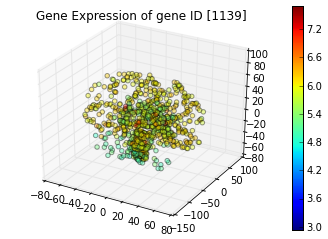

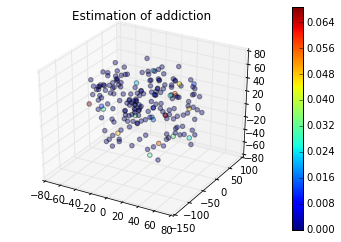

In [14]:
# Visualizing coefficient distribution

V = NsabaVisualizer(tnsaba)
V.visualize_ge(gene)
V.visualize_ns(term)

In [9]:
# Descriptive statistics of term and gene coefficients

analmat = tnsaba.make_ge_ns_mat(term, gene)
tsaba_df = pd.DataFrame(analmat)
tsaba_df.describe()

,0,1
count,893.000000,893.000000
mean,4.729321,0.000779
std,0.671550,0.005241
min,2.942332,0.000000
25%,4.294098,0.000000
50%,4.854128,0.000000
75%,5.165529,0.000000
max,7.686590,0.123320


In [10]:
# Hypothesis testing pre-processing

gt_thres = [row[0] for row in analmat if row[1] > 0]
lt_thres = [row[0] for row in analmat if row[1] <= 0]
len(gt_thres)

76

In [11]:
# T-Test
print "t-value: %.4f \np-value: %.4f" % stats.ttest_ind(lt_thres, gt_thres)

t-value: 2.9564 
p-value: 0.0032
